Treinando uma rede neural
=========================



## Introdução



Depois de uma longa jornada, finalmente chegamos ao *season finale* da nossa saga para construir uma rede neural artificial em Python puro. Agora que já conseguimos criar uma rede neural, o próximo passo é treinar essa rede.



## Objetivo



Treinar uma rede neural artificial tipo Multilayer Perceptron usando Python.



## Importações



In [1]:
import random
from classes import Valor
from funcoes import plota_grafo

## Código e discussão



### Classes



Abaixo estão as classes que criamos no notebook anterior. Elas são as classes de base para criarmos nossa rede neural MLP. Ao longo deste notebook vamos fazer as últimas modificações nelas.



In [2]:
class Neuronio:
    def __init__(self, num_dados_entrada):
        pesos = []

        for _ in range(num_dados_entrada):
            peso = Valor(random.uniform(-1, 1))
            pesos.append(peso)

        self.pesos = pesos
        self.vies = Valor(random.uniform(-1, 1))

    def __call__(self, x):
        """Executa a computação interna do neurônio.

        Args:
          x: lista de valores de entrada (informação que chega ao neurônio).

        Returns:
          Informação que o neurônio propaga adiante. Trata-se da
          aplicação da função de ativação à soma de `x` vezes os pesos do
          neurônio adicionado ao viés.
        """
        assert len(x) == len(self.pesos), "Seu x tem tamanho errado."

        soma = 0
        for x_, p in zip(x, self.pesos):
            soma = soma + x_ * p

        soma = soma + self.vies
        dado_de_saida = soma.sig()
        return dado_de_saida
        
    def parametros(self):
        return self.pesos + [self.vies]

class Camada:
    def __init__(self, num_dados_entrada, num_neuronios):
        neuronios = []

        for _ in range(num_neuronios):
            neuronio = Neuronio(num_dados_entrada)
            neuronios.append(neuronio)

        self.neuronios = neuronios

    def __call__(self, x):
        """Executa a computação de cada neurônio da camada.

        Args:
          x: lista de valores de entrada (informação que chega aos neurônios).

        Returns:
          Informação que os neurônios da camada propagam adiante.
        """
        saidas = []

        for neuronio in self.neuronios:
            informacao = neuronio(x)
            saidas.append(informacao)

        if len(saidas) == 1:
            return saidas[0]
        else:
            return saidas
        
    def parametros(self):
        params = []
        for neuronio in self.neuronios:
            params.extend(neuronio.parametros())
        return params


class MLP:
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):

        percurso = [num_dados_entrada] + num_neuronios_por_camada
        camadas = []

        for i in range(len(num_neuronios_por_camada)):
            camada = Camada(percurso[i], percurso[i+1])
            camadas.append(camada)

        self.camadas = camadas

    def __call__(self, x):
        """Executa a computação de cada camada.

        Como a rede MLP é uma rede feedforward, a informação que uma camada
        recebe é a informação de saída da camada anterior. A única exceção é a
        camada de entrada, onde a informação é fornecida pelo usuário

        Args:
          x: informação fornecida na camada de entrada.

        Returns:
          Informação recuperada na camada de saída.
        """
        for camada in self.camadas:
            x = camada(x)
        return x
    
    def parametros(self):
        params = []
        for camada in self.camadas:
            params.extend(camada.parametros())
        return params

### A função de perda (*loss function*)



Fomos ao laboratório e sintetizamos 4 amostras de [complete com o que quiser]. Cada uma dessas amostras foi feita variando 3 parâmetros de processamento diferentes. Estas amostras e seus parâmetros de processamento estão representados na variável `x` abaixo.

Levamos essas 4 amostras no equipamento [complete com o que quiser] e obtivemos uma resposta que está representada na variável `y_true` abaixo.



In [3]:
x = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

y_true = [1, 0, 0.2, 0.5]

Queremos treinar uma MLP que seja capaz de modelar o comportamento que observamos. Isto é, queremos uma rede neural que receba informação sobre os 3 parâmetros de processamento e que com isso seja capaz de prever qual o resultado que teríamos no equipamento que mencionamos no parágrafo anterior.

Vamos, primeiramente, criar uma rede neural simples do tipo MLP.



In [4]:
NUM_DADOS_DE_ENTRADA = 3  # são 3 parâmetros que descrevem cada amostra
NUM_DADOS_DE_SAIDA = 1    # queremos apenas um valor de saída por amostra
CAMADAS_OCULTAS = [3, 2]  # fique à vontade para alterar aqui

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]

minha_mlp = MLP(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

Com nossa rede criada, podemos realizar uma previsão! Mas muito provavelmente esta previsão será bastante subótima.



In [5]:
y_pred = []

for x_ in x:
    valor_previsto = minha_mlp(x_)
    y_pred.append(valor_previsto)

print(y_true)
print(y_pred)

[1, 0, 0.2, 0.5]
[Valor(data=0.48253959814495945), Valor(data=0.4673080410783169), Valor(data=0.46713590878365124), Valor(data=0.4717733221789461)]


Nosso resultado, assim como esperado, é bastante subótimo. Mas como quantificar isso? Seria bom se existisse uma forma de quantificar em um único número o quão boa está a previsão da minha rede.

Uma forma de quantificar a qualidade da previsão é usando uma `função de perda`, mais conhecida como `loss function`. Aqui podemos, por exemplo, computar a soma dos erros quadráticos. Esta é uma função de perda muito usada em problemas de regressão.



In [6]:
erros_quadrados = []

for yt, yp in zip(y_true, y_pred):
    erro_quadratico = (yp - yt) ** 2
    erros_quadrados.append(erro_quadratico)

loss = sum(erros_quadrados)
print(loss)

Valor(data=0.5583004118469148)


A variável `loss` é uma medida da performance da rede neural que criamos. Essa variável é uma instância de `Valor`, logo podemos facilmente observar o grafo computacional desta métrica.



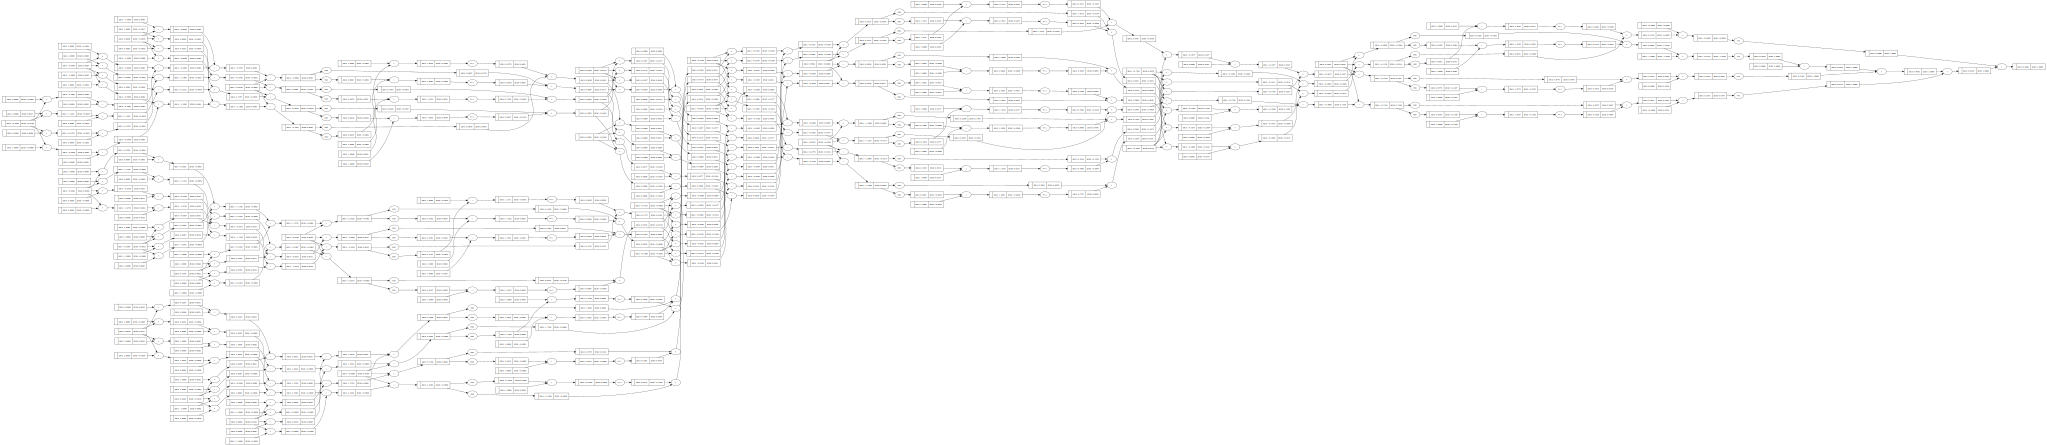

In [7]:
loss.propagar_tudo()
grafo = plota_grafo(loss)
grafo.render("rede_neural", format="png")
grafo

### Treinando a rede através da atualização dos parâmetros



Como vimos acima, o grafo computacional da nossa rede neural é bastante complexo! Cheio de vértices!

Nosso objetivo é treinar a rede neural que criamos, sendo que para isso precisamos alterar os parâmetros internos da rede. O primeiro passo para fazer isso é alterar as nossas classes de forma que o código abaixo funcione.



In [8]:
parametros = minha_mlp.parametros()

print(len(parametros))
print()
parametros

23



[Valor(data=-0.3940374591329394),
 Valor(data=-0.9509365414636755),
 Valor(data=0.8037911677615646),
 Valor(data=-0.5539663021722736),
 Valor(data=-0.5580866183676669),
 Valor(data=-0.5586953967842443),
 Valor(data=0.15644008599874226),
 Valor(data=-0.9789804237826927),
 Valor(data=0.6534932847804824),
 Valor(data=0.6283291109591191),
 Valor(data=0.08650948606337927),
 Valor(data=-0.6588216780869325),
 Valor(data=0.09561235186597727),
 Valor(data=-0.10884936924809696),
 Valor(data=-0.9139384676829492),
 Valor(data=0.9055495526221806),
 Valor(data=0.5206181008909934),
 Valor(data=-0.41271064090373977),
 Valor(data=-0.6541645470763842),
 Valor(data=-0.8215072150028613),
 Valor(data=-0.32437269514125955),
 Valor(data=-0.7181016646183507),
 Valor(data=0.23630722502789125)]

Agora que conseguimos &ldquo;extrair&rdquo; os parâmetros da nossa MLP, podemos fazer o treino deles! Temos que pensar bem como alterar os parâmetros da maneira correta. Lembre-se que nosso desejo é reduzir a métrica computada pela função de perda.



In [9]:
TAXA_DE_APRENDIZADO = 0.01

for p in minha_mlp.parametros():
    p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

Agora que executamos um &ldquo;ciclo&rdquo; de treino, podemos observar o impacto disso!



In [10]:
y_pred = []
for x_ in x:
    valor_previsto = minha_mlp(x_)
    y_pred.append(valor_previsto)

erros_quadrados = []
for yt, yp in zip(y_true, y_pred):
    erro_quadratico = (yp - yt) ** 2
    erros_quadrados.append(erro_quadratico)

loss = sum(erros_quadrados)
loss.propagar_tudo()
print(loss)

Valor(data=0.5581283495300359)


### A descida do gradiente



Apenas um &ldquo;ciclo&rdquo; de treino costuma não ser suficiente para treinarmos uma rede neural, precisamos de mais! Antes de seguir em frente, vamos definir um termo: chamamos de `época` toda vez que nossa rede neural propaga *todo* nosso dataset. É comum treinarmos redes neurais por dezenas, centenas e até milhares de épocas!

Vamos programar um treino completo da rede neural!

Um detalhe: sempre temos que zerar os gradientes antes de fazer o backpropagation. Isso é necessário pois cada vez que alteramos os parâmetros estaremos em outra posição da curva de perda e os gradientes antigos já não são mais válidos.



In [11]:
NUM_DADOS_DE_ENTRADA = 3  # são 3 parâmetros que descrevem cada amostra
NUM_DADOS_DE_SAIDA = 1    # queremos apenas um valor de saída por amostra
CAMADAS_OCULTAS = [3, 2]  # fique à vontade para alterar aqui

x = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

y_true = [1, 0, 0.2, 0.5]

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]
minha_mlp = MLP(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

In [12]:
NUM_EPOCAS = 1000
TAXA_DE_APRENDIZADO = 0.01

for epoca in range(NUM_EPOCAS):
    # forward pass
    y_pred = []
    for x_ in x:
        previsao = minha_mlp(x_)
        y_pred.append(previsao)

    # zero grad
    for p in minha_mlp.parametros():
        p.grad = 0
    
    # loss
    loss = []
    for yp, yt in zip(y_pred, y_true):
        loss.append((yp - yt)**2)
    loss = sum(loss)

    # backpropagation
    loss.propagar_tudo()

    # atualiza parâmetros
    for p in minha_mlp.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    # mostra resultado
    print(epoca, loss.data)

0 0.823463054418201
1 0.8221407729560211
2 0.8208182018049772
3 0.8194953936655232
4 0.8181724015385625
5 0.816849278717357
6 0.815526078779272
7 0.8142028555773612
8 0.8128796632317914
9 0.8115565561211092
10 0.8102335888733554
11 0.8089108163570237
12 0.8075882936718702
13 0.8062660761395769
14 0.8049442192942673
15 0.803622778872882
16 0.8023018108054145
17 0.8009813712050106
18 0.799661516357935
19 0.7983423027134076
20 0.7970237868733148
21 0.7957060255817964
22 0.7943890757147137
23 0.793072994269004
24 0.7917578383519186
25 0.7904436651701597
26 0.7891305320189086
27 0.7878184962707542
28 0.7865076153645314
29 0.7851979467940621
30 0.7838895480968135
31 0.7825824768424743
32 0.7812767906214516
33 0.7799725470332963
34 0.7786698036750614
35 0.7773686181295953
36 0.77606904795378
37 0.7747711506667107
38 0.7734749837378361
39 0.7721806045750472
40 0.7708880705127334
41 0.7695974387998057
42 0.7683087665876918
43 0.7670221109183099
44 0.7657375287120272
45 0.7644550767556079
46 0.7

Após o treino, podemos checar se nossa rede é capaz de prever os dados que coletamos com boa performance.



In [13]:
print(y_true)
print(y_pred)

[1, 0, 0.2, 0.5]
[Valor(data=0.4313810931632274), Valor(data=0.4203334963807509), Valor(data=0.41879918533859706), Valor(data=0.4280940222850618)]


Esse processo de atualizar os parâmetros da rede neural observando os gradientes locais é chamado de `descida do gradiente` (ou apenas `método do gradiente`).



## Conclusão



<p style = "text-align:justify">
Dando continuidade ao que foi concluido no experimento R.06, nesse notebook estamos tornando viva a nossa rede neural. Tornando viva porque, no experimento anterior, montamos com a classe MLP toda a estrutura e organização de uma rede neural artificial. Porém, as previsões que ela faz são sub-subótimas e não havia uma maneira de treiná-la, ou seja, é uma rede neural que não ```aprende```. Agora, adicionando a função de perda, podemos primeiramente guia-la para um objetivo (minimização de perda) e assim desenvolver um método de alterar seus parâmetros a cada época para progredir no objetivo.  
</p>
<p style = "text-align:justify">
Talvez a parte mais interessante do notebook é o``` método do gradiente```, e a sua relação com a ```taxa de aprendizado```. No caso de funções de perda, podemos imaginar que o(s) valor(es) de saída que uma rede neural gera é um simples ponto em um hiperplano de diferentes parâmetros. A cada época, esse ponto muda de posição, tentando sempre diminuir seu valor em busca do mínimo do vale em que se encontra. Dái, entra o conceito de ```taxa de aprendizado```, que basicamente é o tamanho do passo que esse ponto dará na sua próxima geração. Se esse passo for maior que o mínimo global, ele nunca conseguirá localixar corretamente esse mínimo, o que pode ser resolvido com a diminuição da grandeza da taxa de aprendizado. Em redes neurais mais complexas, o próprio algoritmo já reduz a taxa de aprendizado de acordo com o progresso, visando sempre o aperfeiçoamento máximo do aprendizado da Rede Neural.
</p>

## Playground

